In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
# Importing the train and the test dataset
train=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Performing the Exploratory Data Analysis

### Counting the number of words in a tweet

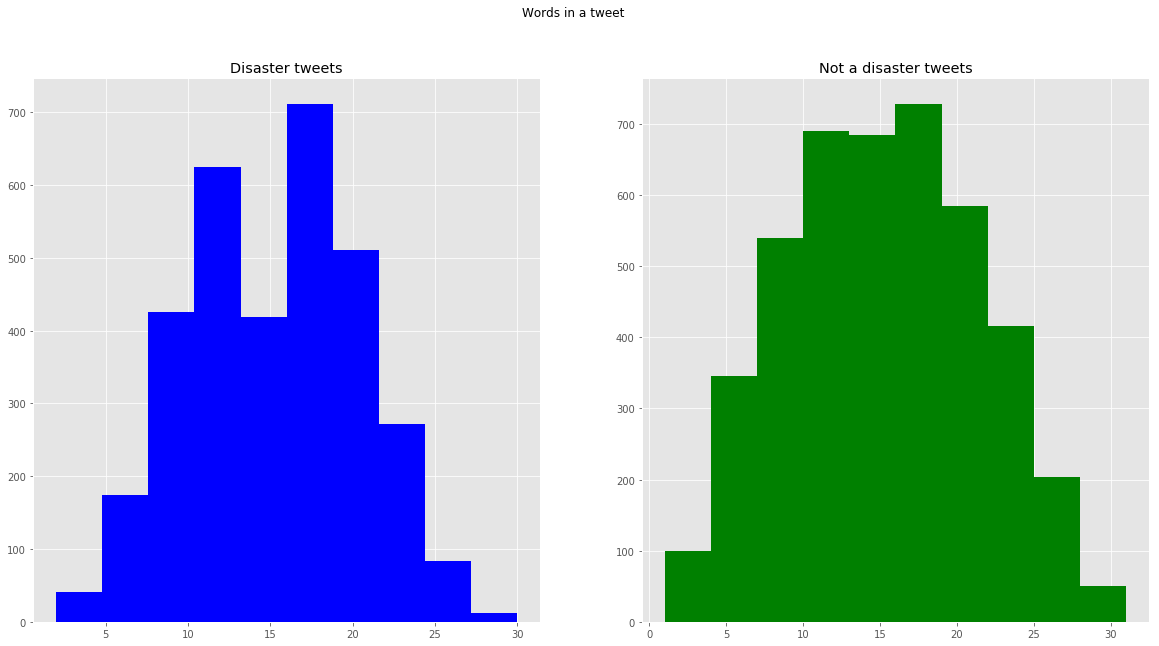

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
length=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(length,color='blue')
ax1.set_title('Disaster tweets')
length=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(length,color='green')
ax2.set_title('Not a disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

### Plotting the average word length

Text(0.5, 0.98, 'Average word length in each tweet')

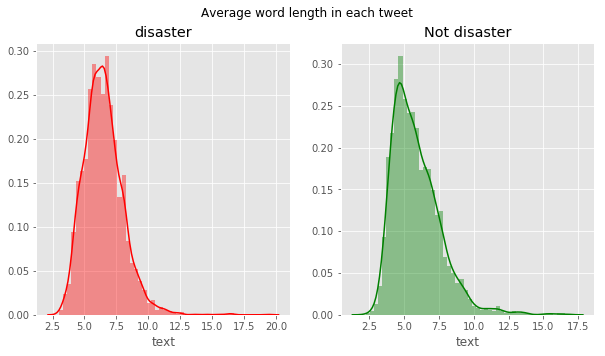

In [4]:
import seaborn as sns
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word_len=train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word_len.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word_len=train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word_len.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

## Building the model

In [5]:
x = train["text"]
y = train["target"]

In [6]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [7]:

vect = CountVectorizer(stop_words = 'english')

x_train_cv = vect.fit_transform(X_train)
x_test_cv = vect.transform(X_test)

In [8]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
pred = clf.predict(x_test_cv)
pred

array([1, 0, 1, ..., 0, 0, 1])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8042907180385289

In [11]:
y_test = test["text"]
y_test_cv = vect.transform(y_test)
pred_test = clf.predict(y_test_cv)
pred_test

array([1, 1, 1, ..., 1, 1, 1])

In [12]:
sub = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [13]:
sub["target"] = pred_test
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [14]:
sub.to_csv("submission.csv",index=False)